# Lord of The Rings Character Predictions YOLOv8


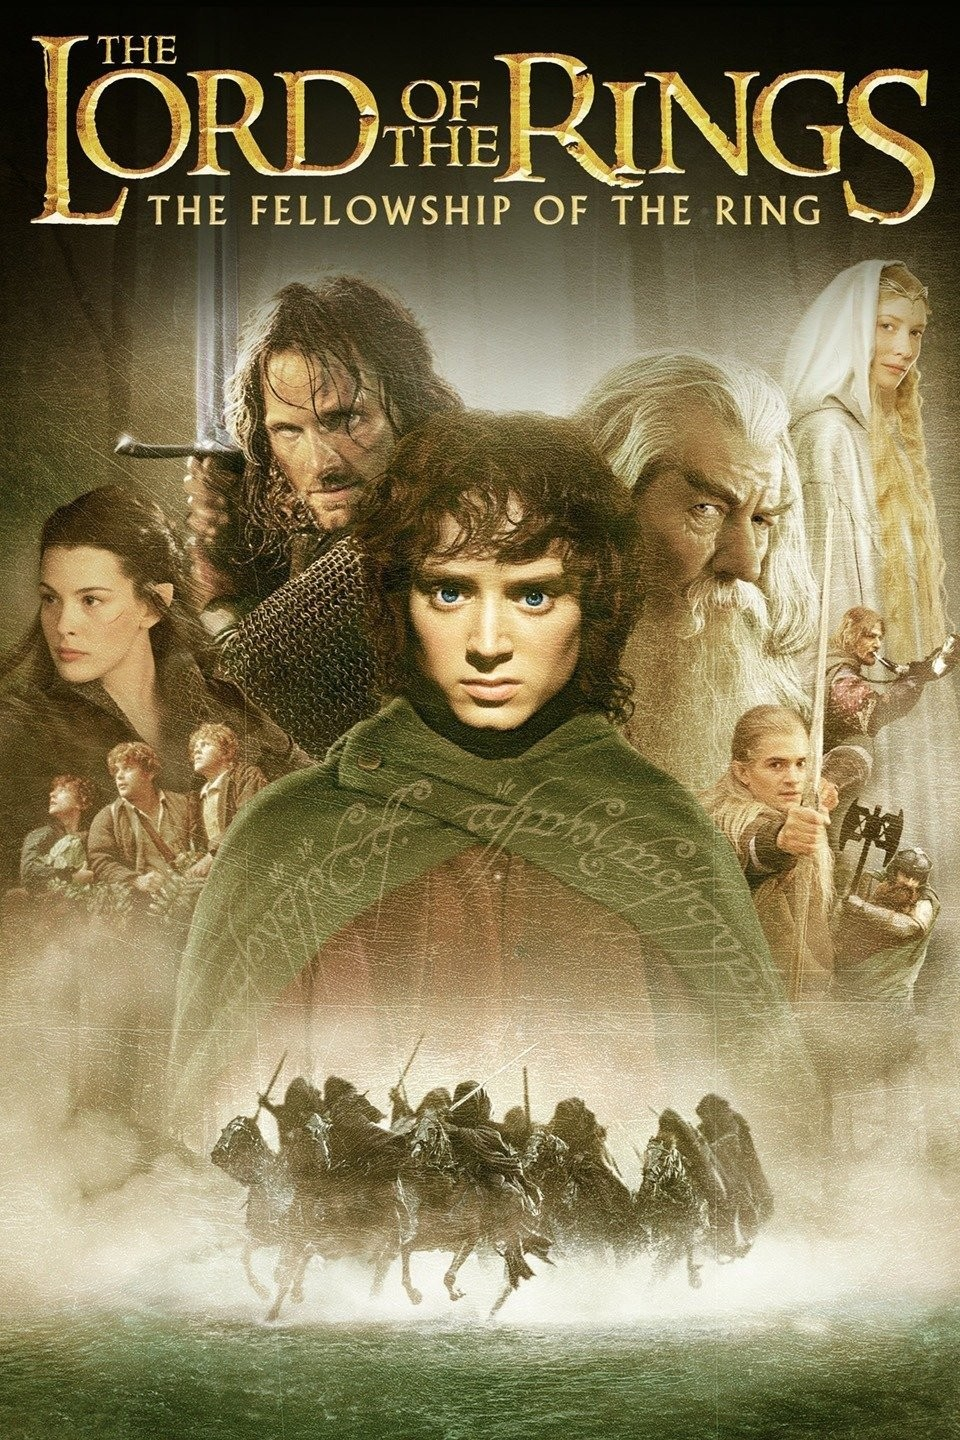

This project **aimed** to leverage the You Only Look Once v8 (YOLOv8) deep learning model for character recognition in imagery associated with the Lord of the Rings franchise. The goal was to develop a system capable of identifying and classifying characters within these images.

The images obtained from **Make Sense** and **Roboflow** underwent preprocessing steps to ensure optimal training for YOLOv8.YOLOv8 efficiently predicts bounding boxes and class labels around objects within an image, making it suitable for character recognition in this context.
The preprocessed images fed into the YOLOv8 model for training. During training, the model iteratively adjusted its internal parameters to minimize the difference between its predictions (bounding boxes and class labels for characters) and the actual annotations provided in the training data.

As you rightly identified, a significant **challenge** in this project stems from the inherent similarity between the characters in the Lord of the Rings universe. Since most characters are human, differentiating between them based solely on visual features can be difficult for the model, potentially leading to lower accuracy.

## One rings rule them all!!! 

In [3]:
!nvidia-smi

Sun May  5 12:41:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("roboflow")

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key= secret_value_0)
project = rf.workspace("ayaramis").project("lord-v2")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing install


Extracting Dataset Version Zip to Lord-v2-1 in yolov8:: 100%|██████████| 5940/5940 [00:00<00:00, 8788.57it/s]


## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




## Custom Training

In [9]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 160MB/s]
New https://pypi.org/project/ultralytics/8.2.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Lord-v2-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_

In [11]:
!ls /kaggle/working/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch2565.jpg
R_curve.png					   train_batch2566.jpg
args.yaml					   train_batch2567.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1714912981.7e63a2d1c252.107.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


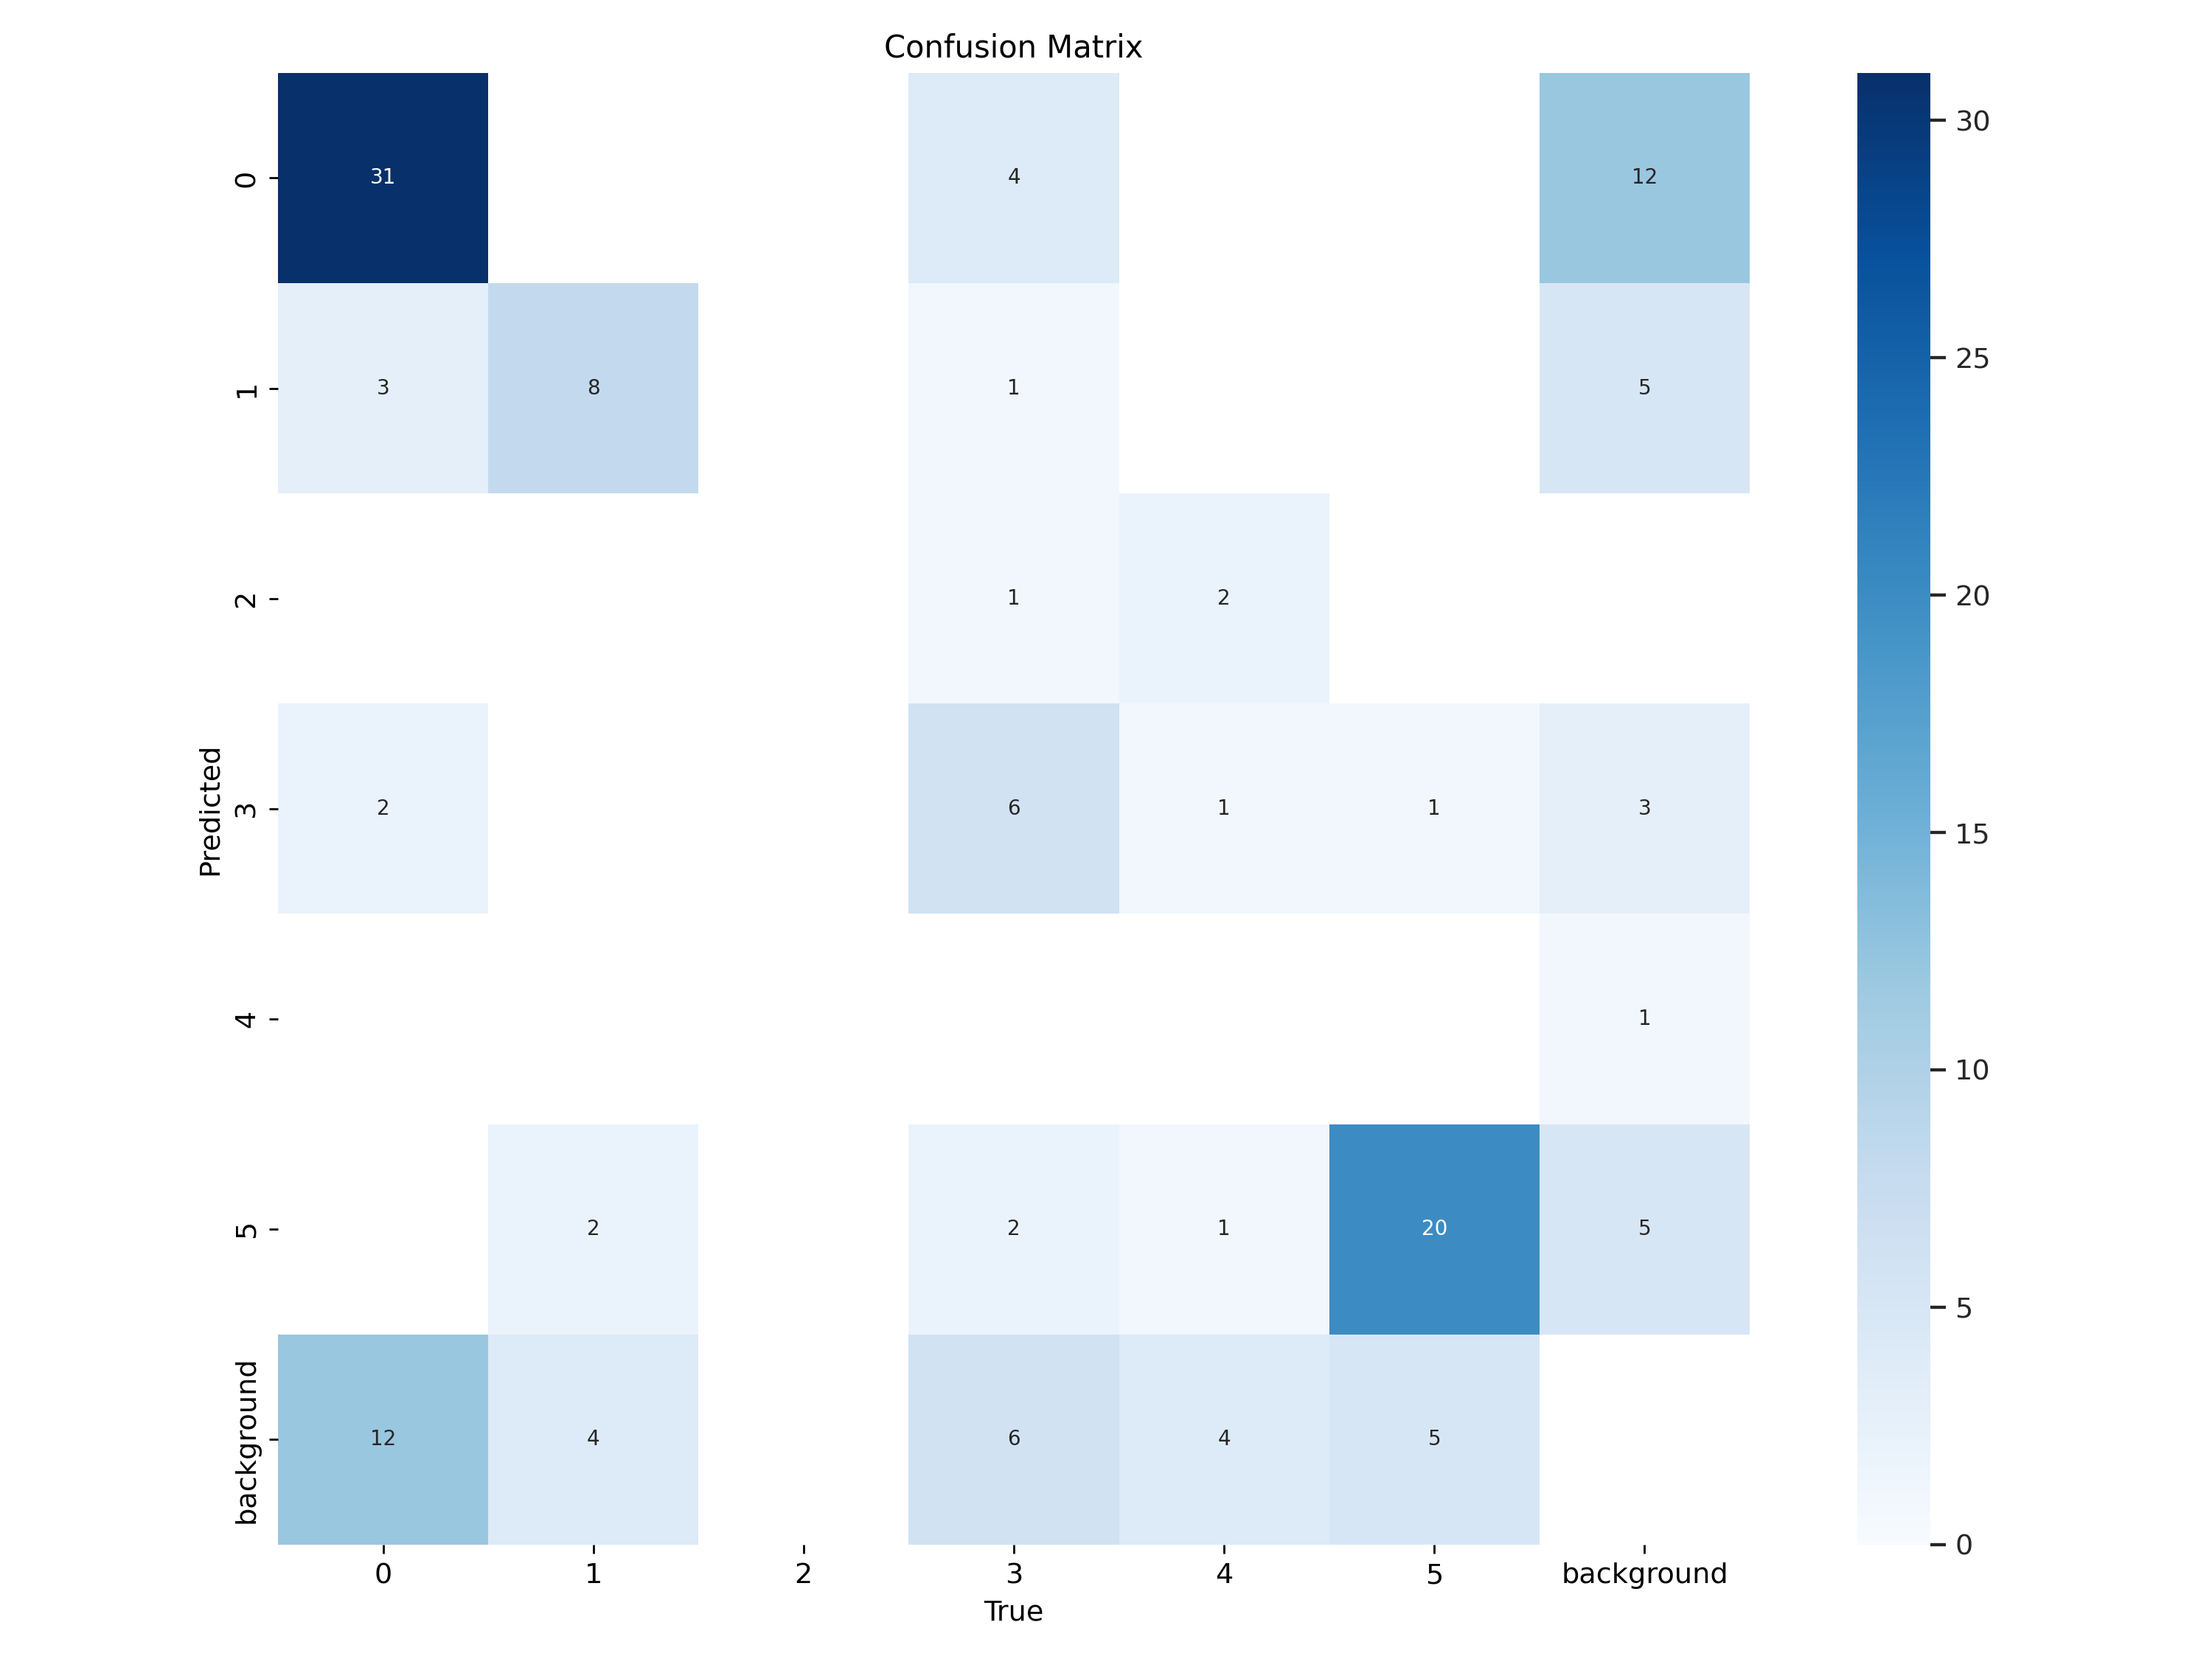

In [14]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=900)

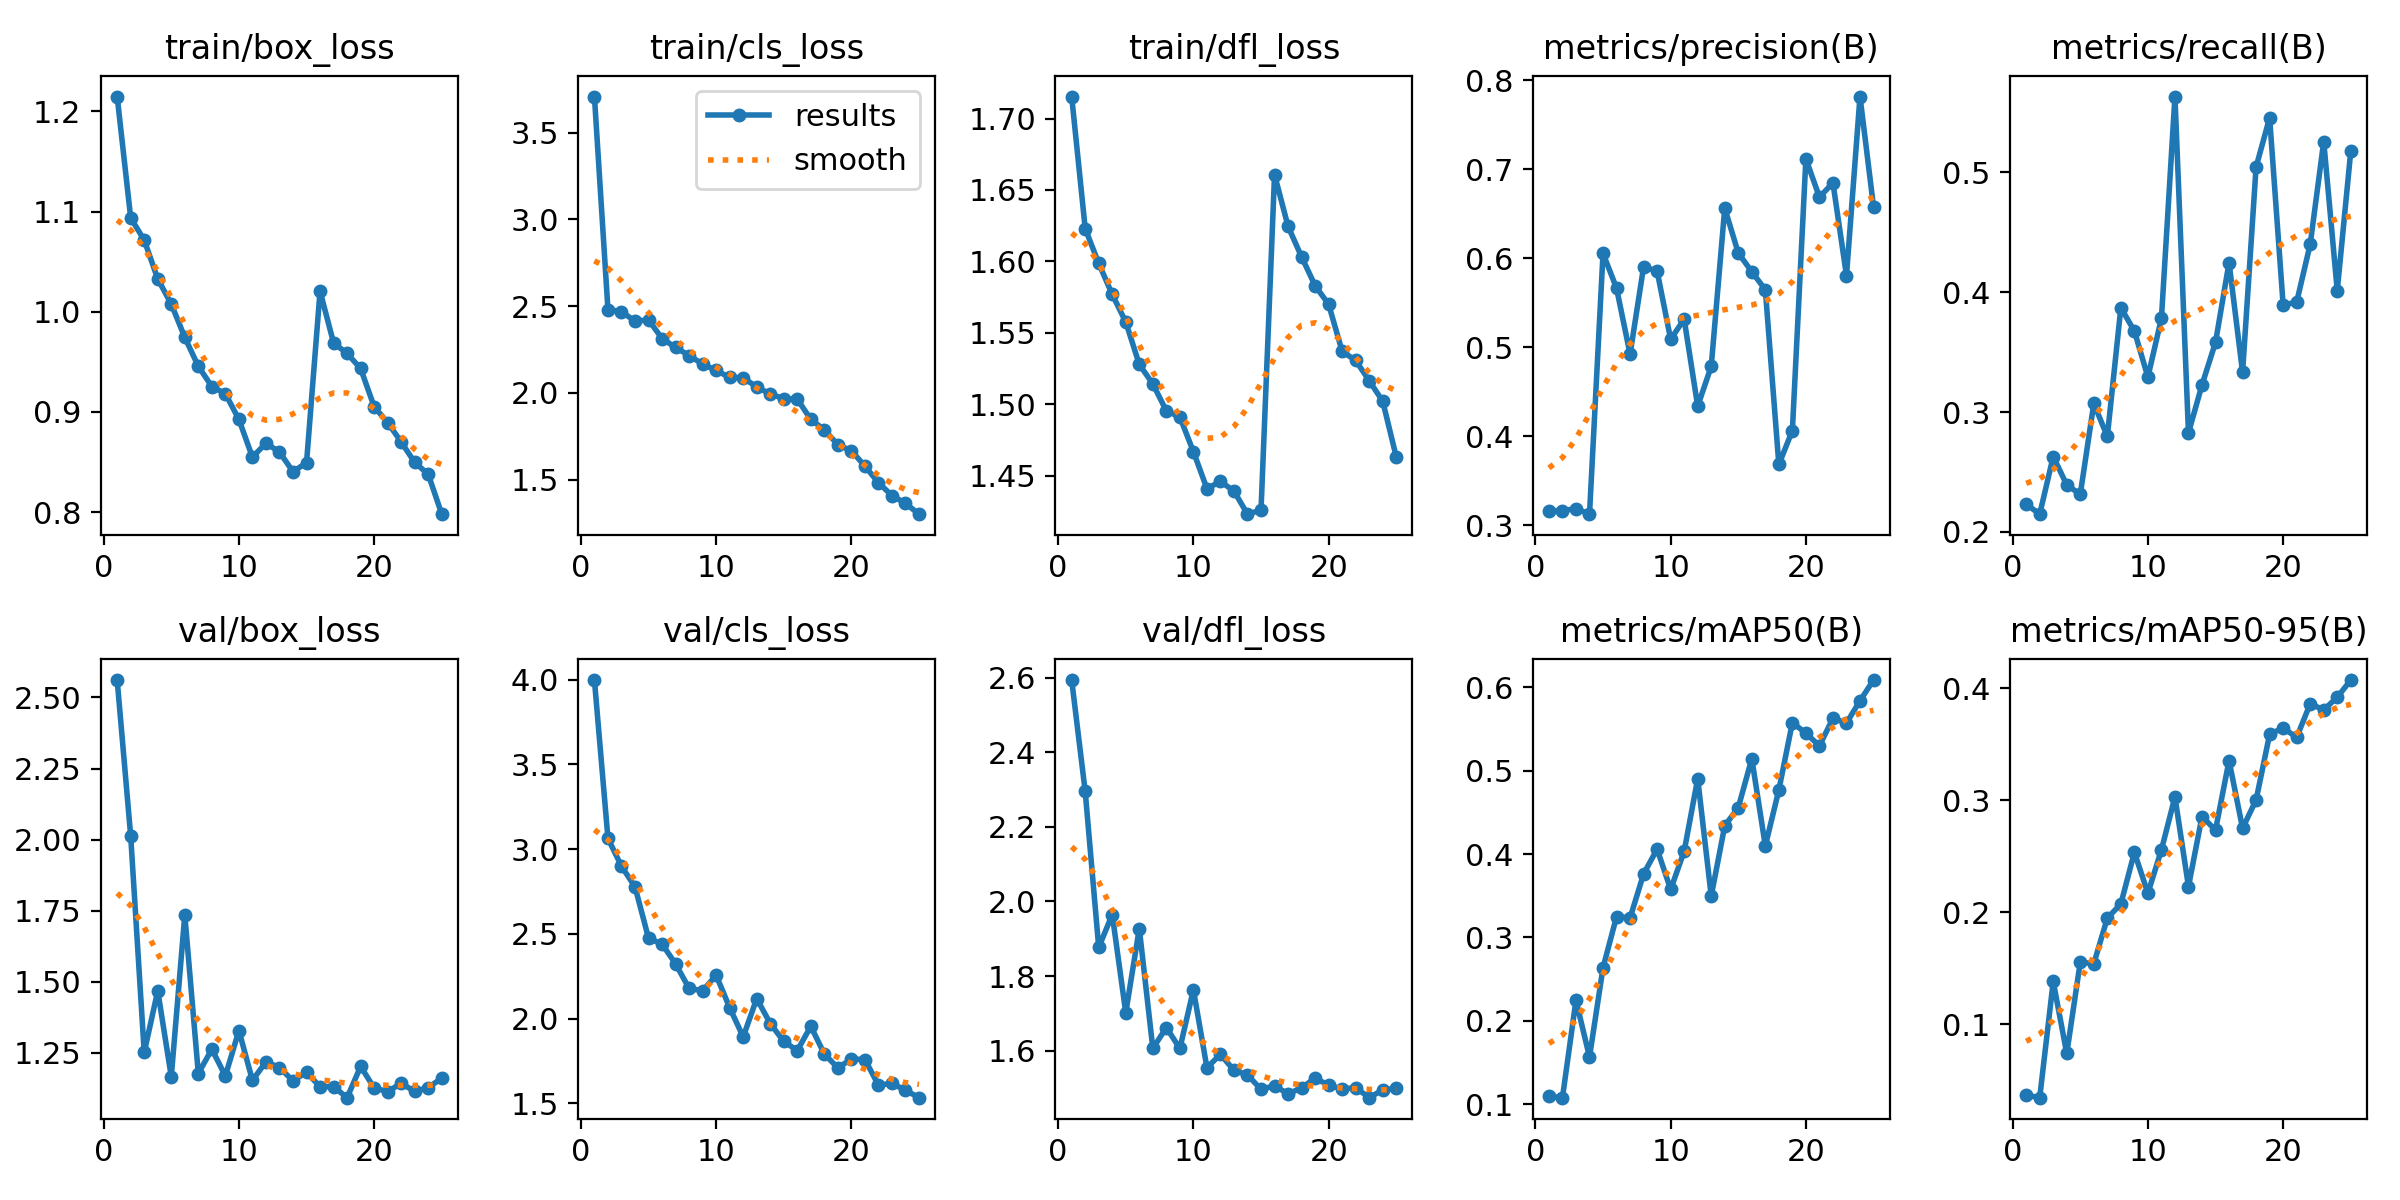

In [16]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=900)

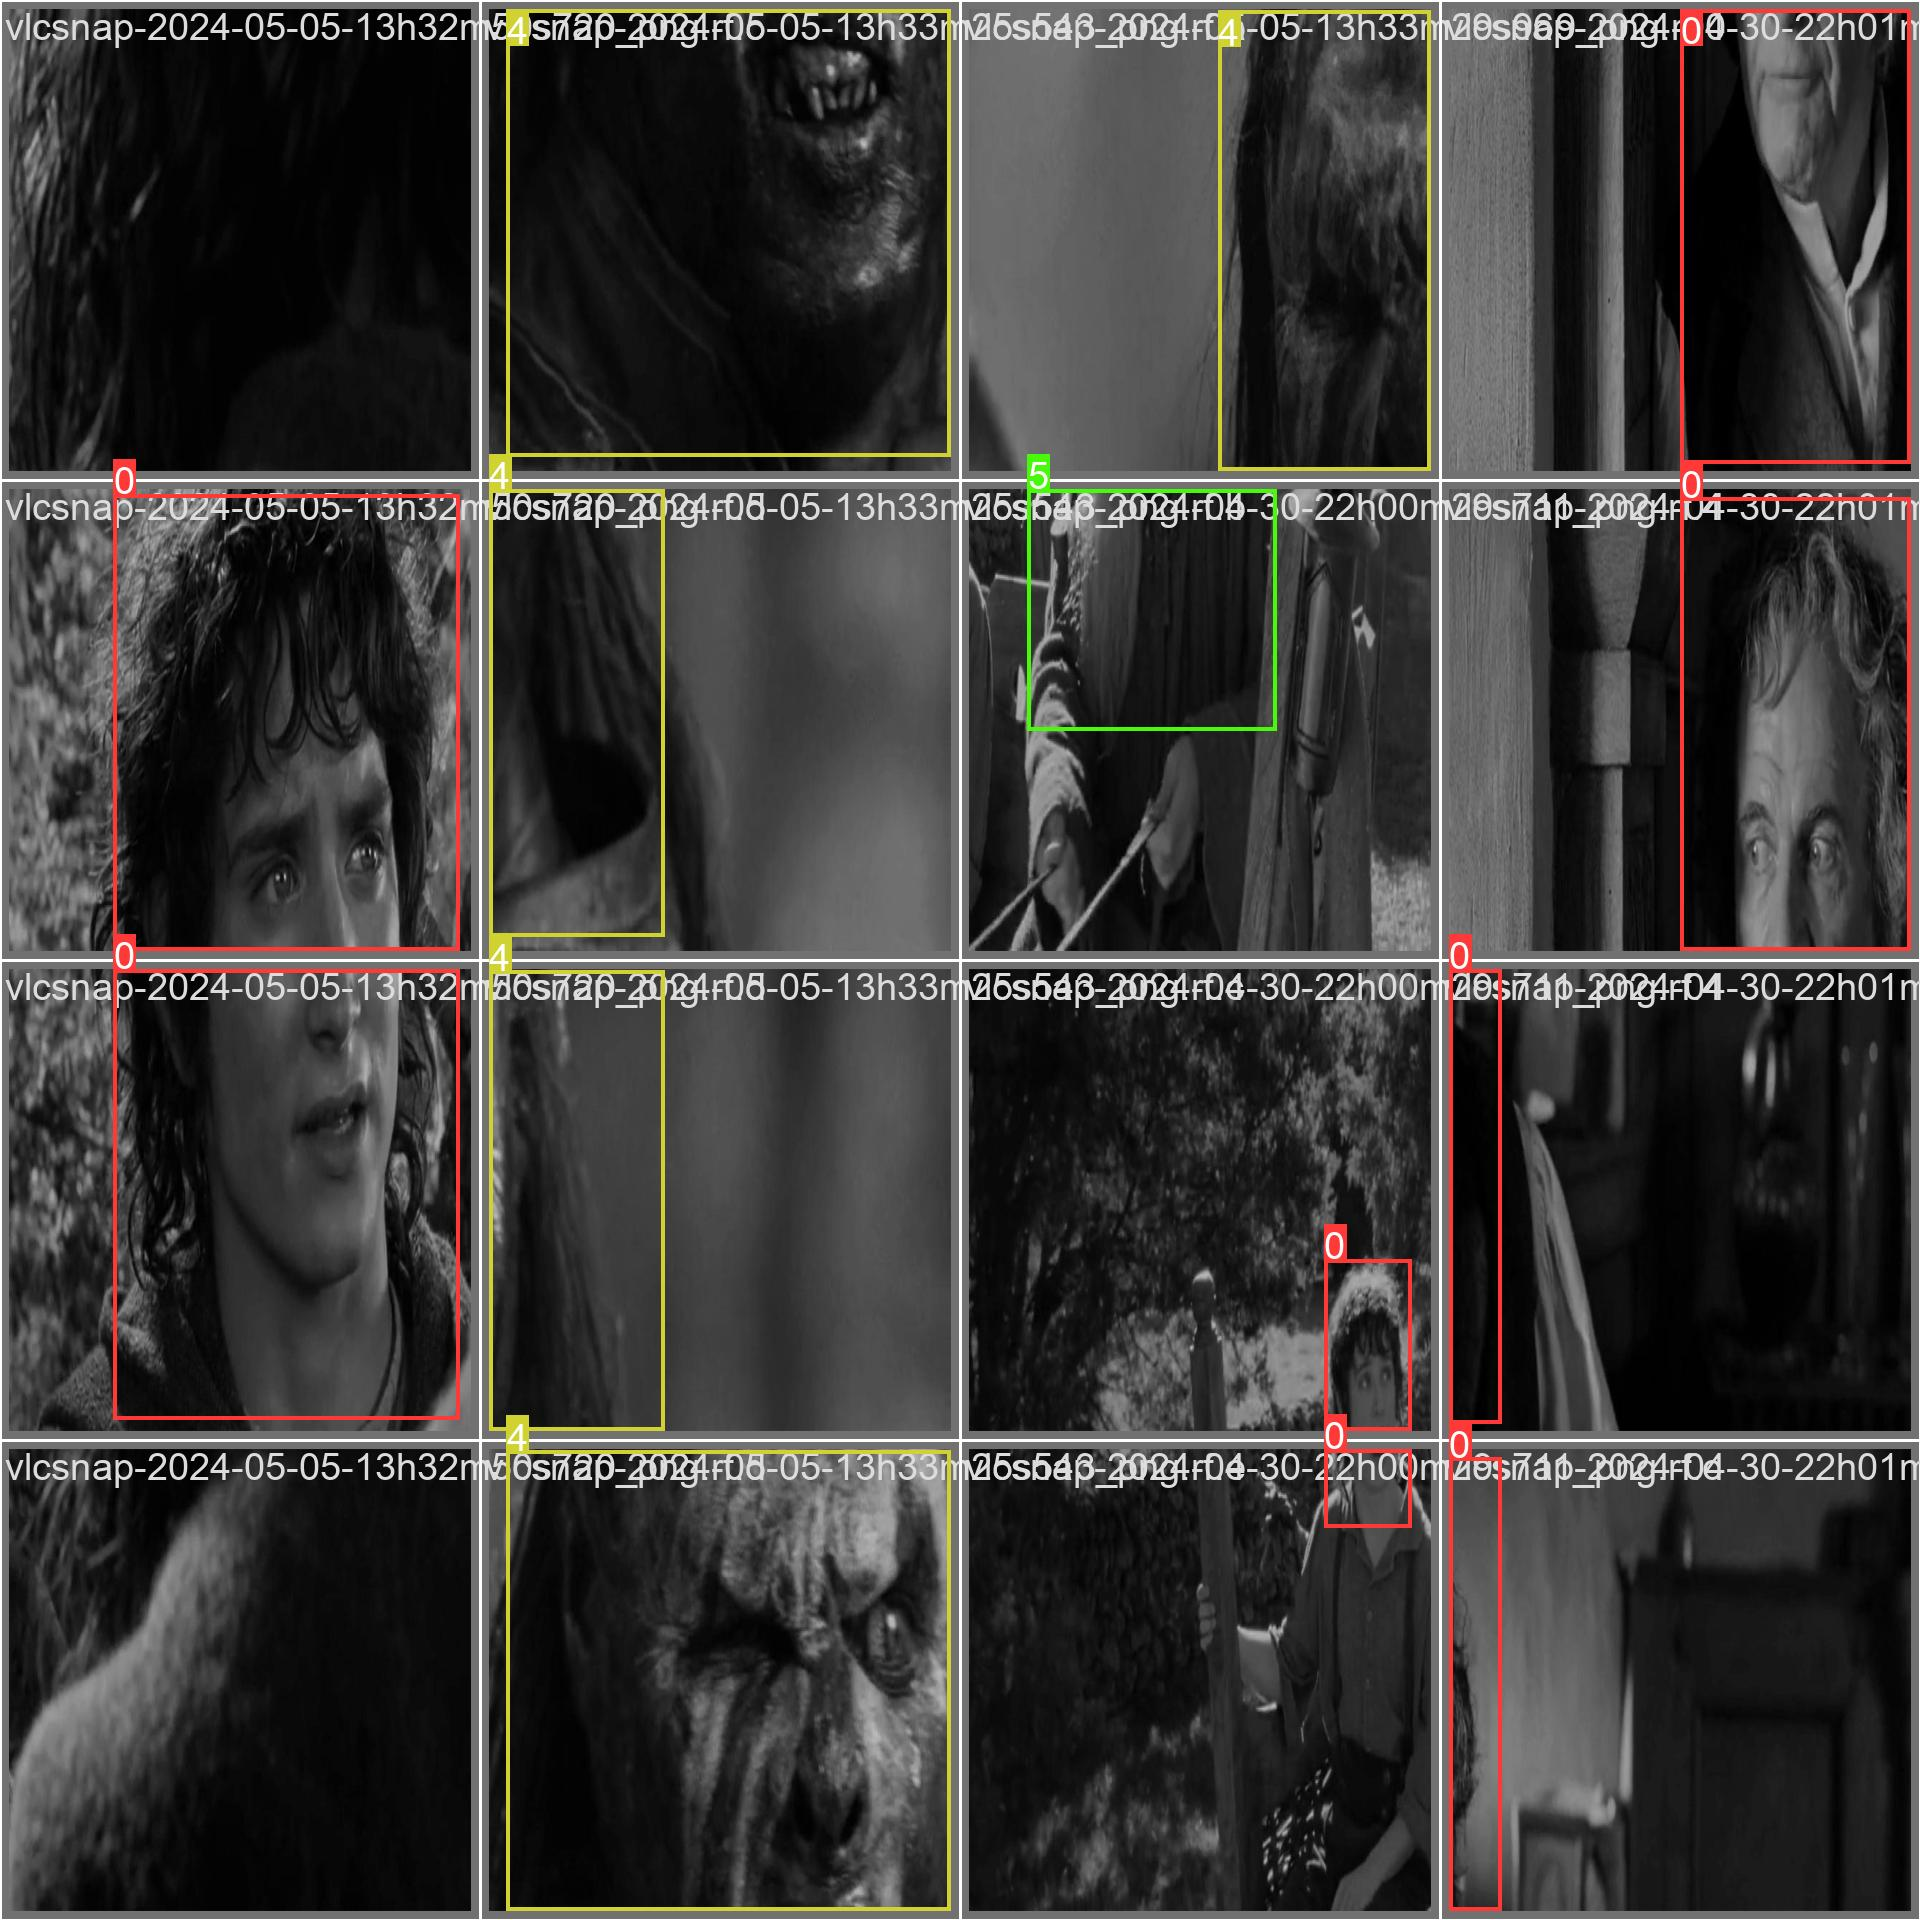

In [18]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch0_labels.jpg', width=600)

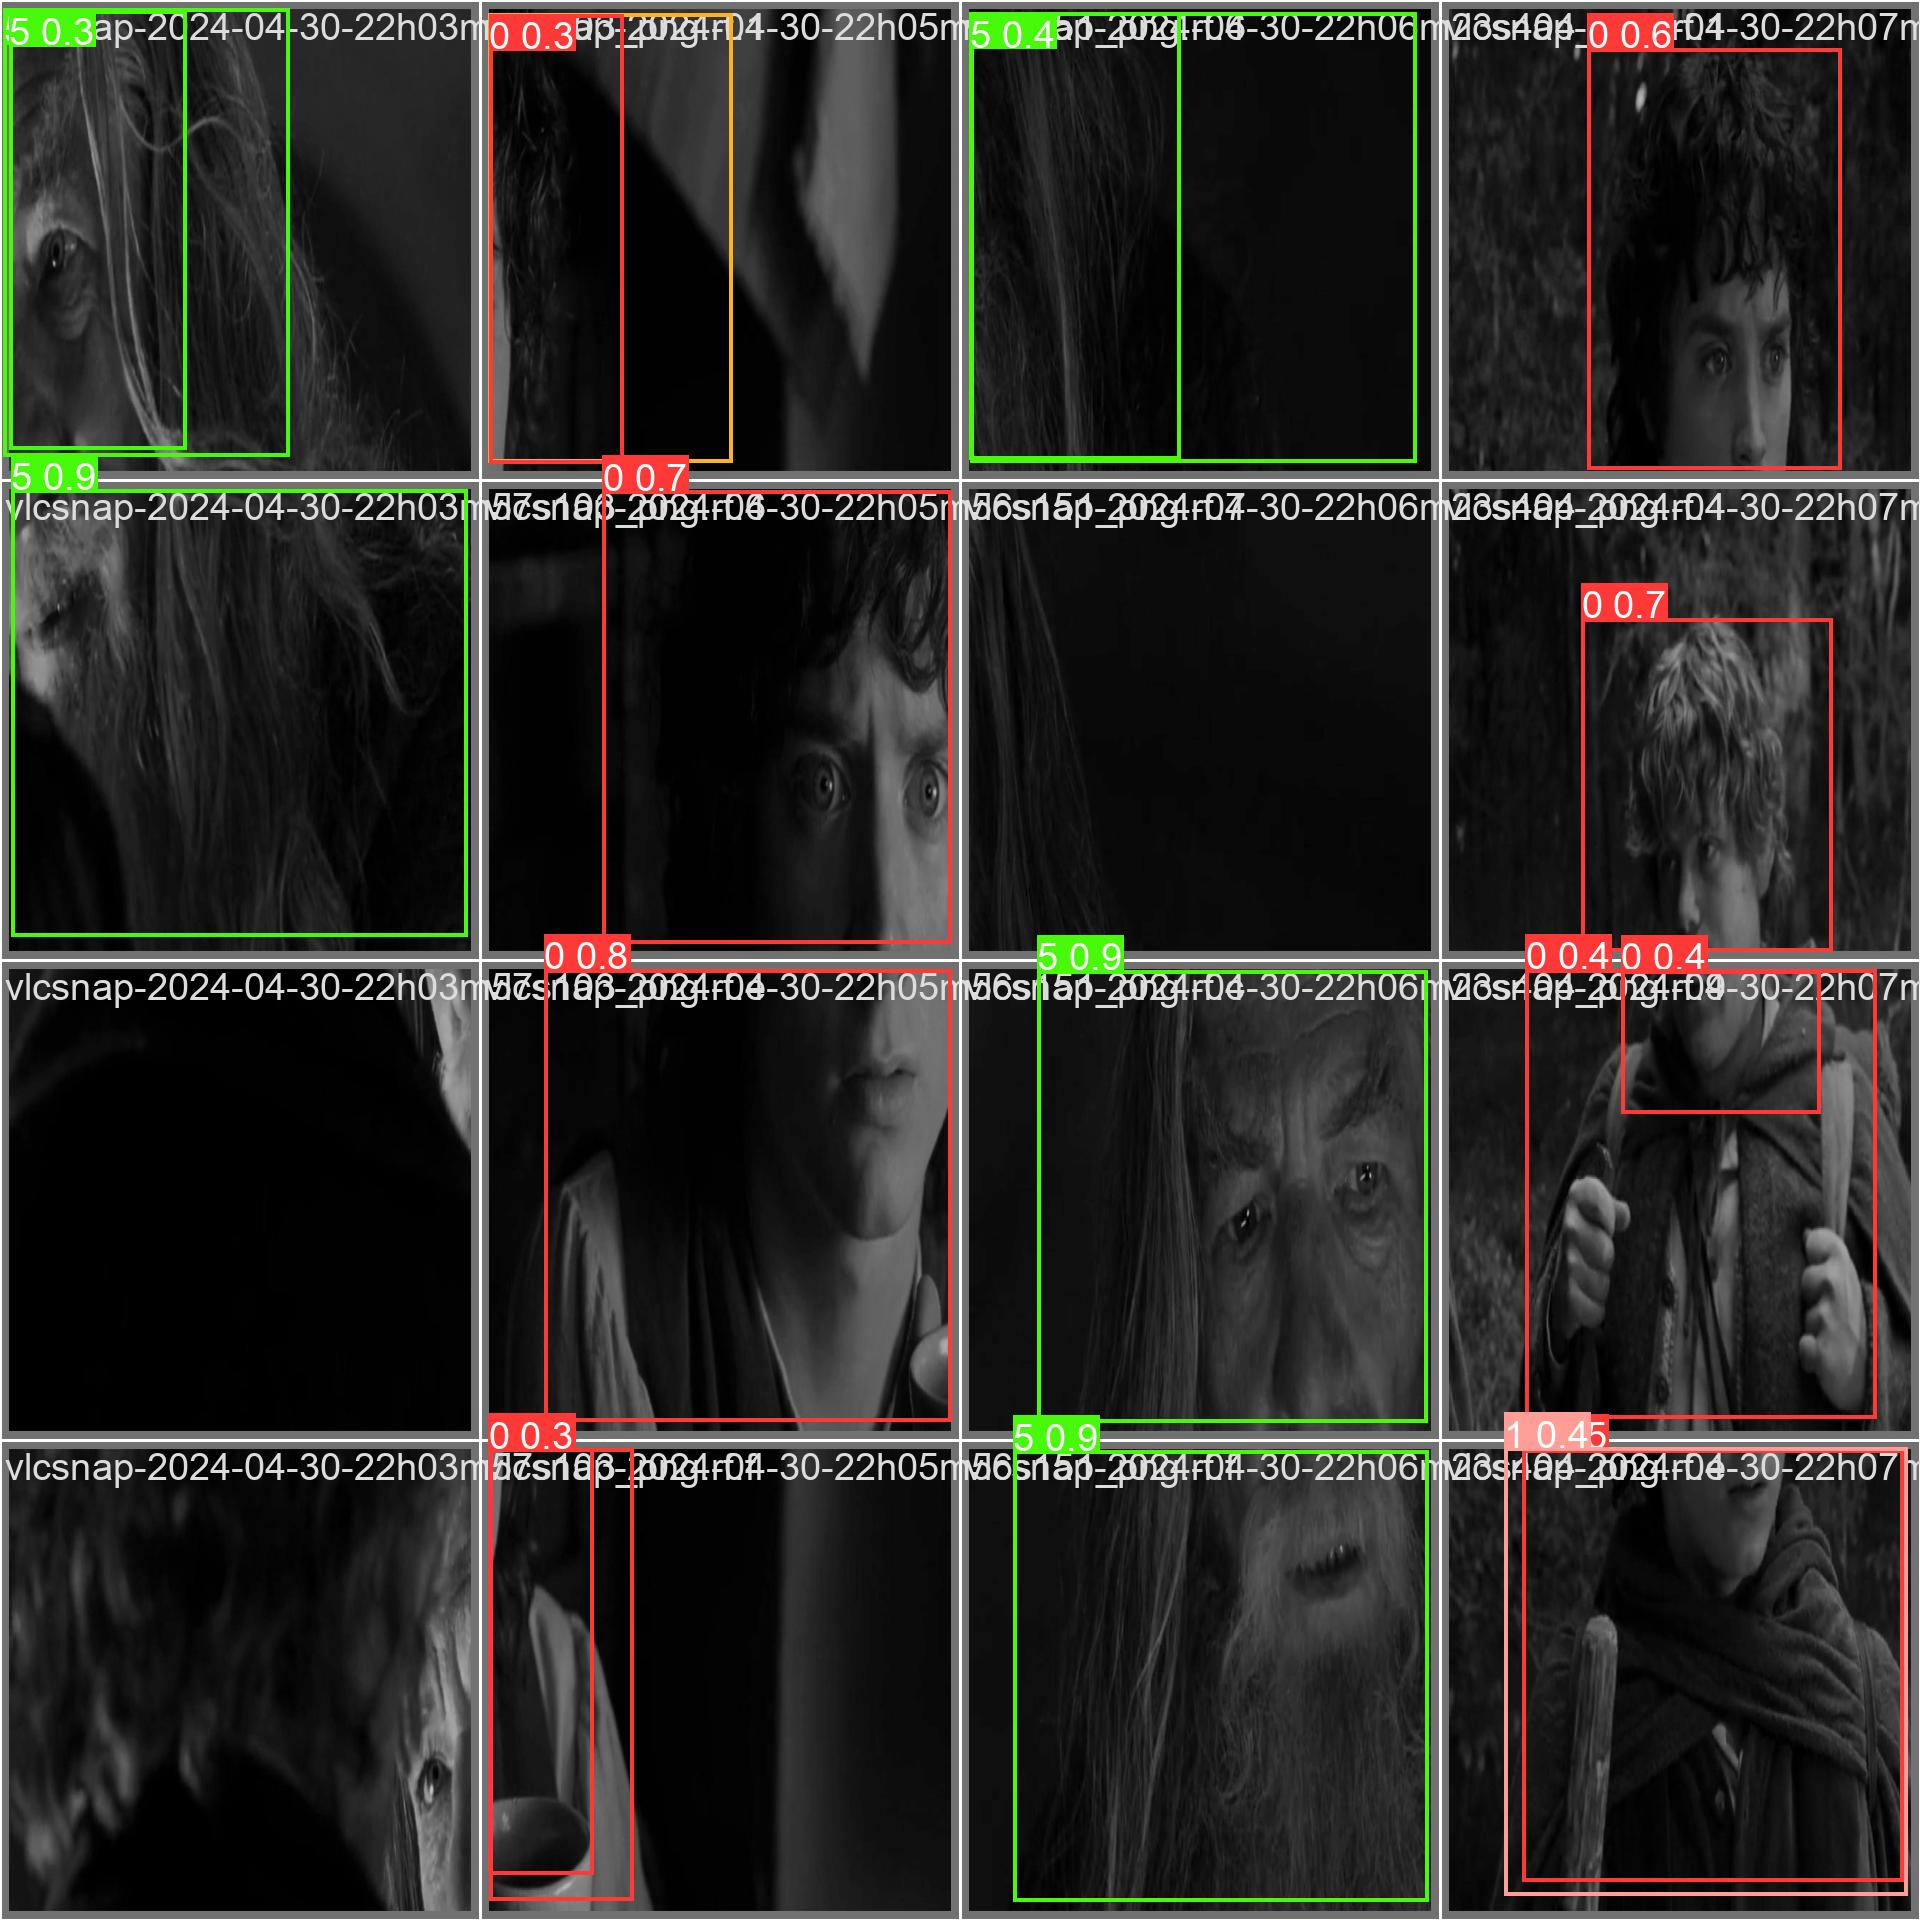

In [21]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [23]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/Lord-v2-1/valid/labels.cache... 116 images, 2 back
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        116        116      0.654      0.518      0.608      0.408
                     0        116         48      0.705      0.625      0.706      0.426
                     1        116         14      0.484      0.671      0.555      0.364
                     3        116         20      0.645        0.4      0.508      0.361
                     4        116          8       0.72      0.125      0.484      0.339
                     5        116         26      0.716      0.769      0.789      0.548
Speed: 3.4ms preprocess, 13.6ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://d

## Inference with Custom Model

In [24]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/112 /kaggle/working/Lord-v2-1/test/images/vlcsnap-2024-04-30-22h00m23s301_png.rf.0735f606674f0862b53e54ae5cd298e9.jpg: 800x800 1 2, 1 5, 22.5ms
image 2/112 /kaggle/working/Lord-v2-1/test/images/vlcsnap-2024-04-30-22h00m23s301_png.rf.0c486fd5e3ea516c0eb7fb5e36fb8318.jpg: 800x800 1 5, 22.5ms
image 3/112 /kaggle/working/Lord-v2-1/test/images/vlcsnap-2024-04-30-22h00m23s301_png.rf.a056012703bac2ccea659ea74fd579e8.jpg: 800x800 1 5, 22.4ms
image 4/112 /kaggle/working/Lord-v2-1/test/images/vlcsnap-2024-04-30-22h00m23s301_png.rf.be039ce0b5106de37444d6a2e1938157.jpg: 800x800 1 5, 22.4ms
image 5/112 /kaggle/working/Lord-v2-1/test/images/vlcsnap-2024-04-30-22h00m54s384_png.rf.0ef906425df7b509d68e9eea30964d3b.jpg: 800x800 1 0, 22.4ms
image 6/112 /kaggle/working/Lord-v2-1/test/images/vlcsnap-2024-04-30-22h00m54s384_png.rf.29e18ba

**NOTE:** Let's take a look at few results.

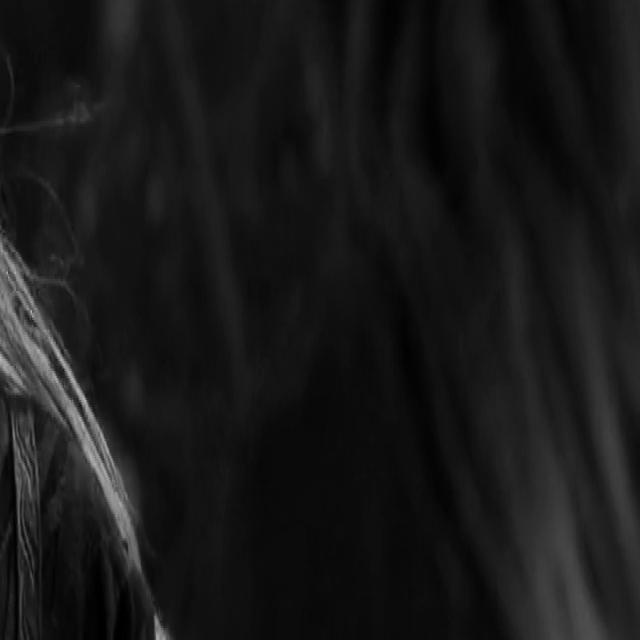

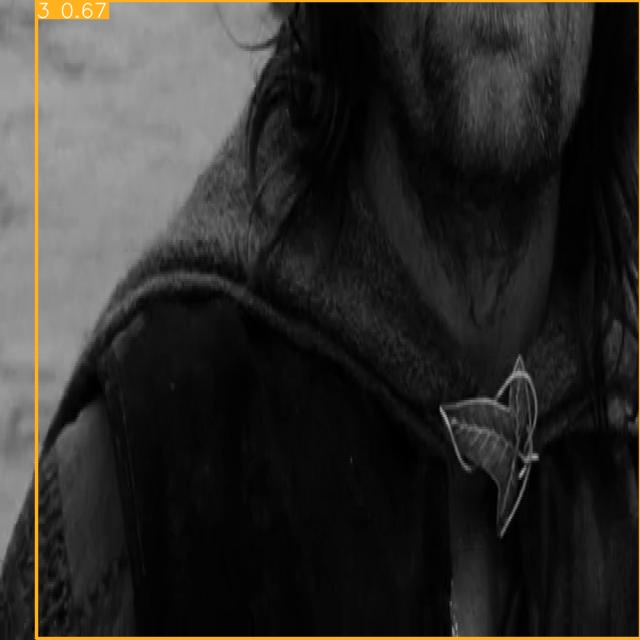

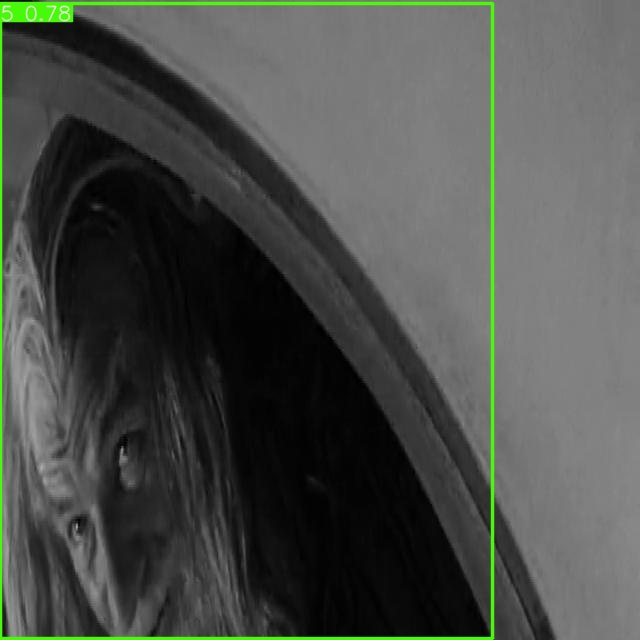

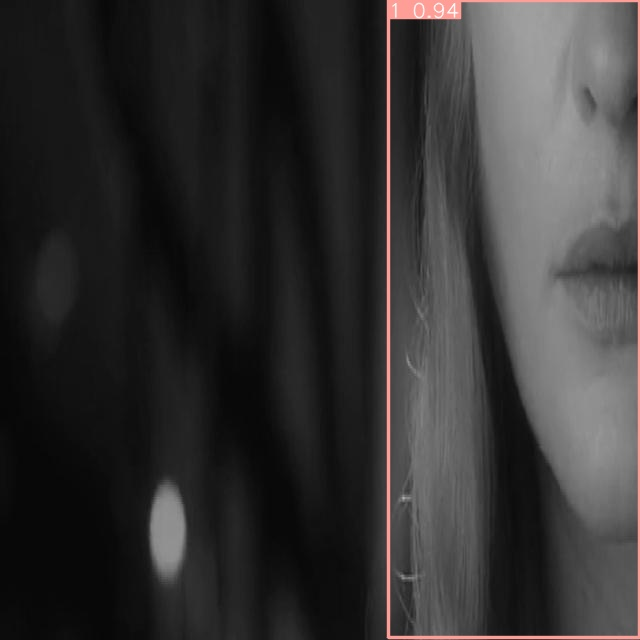

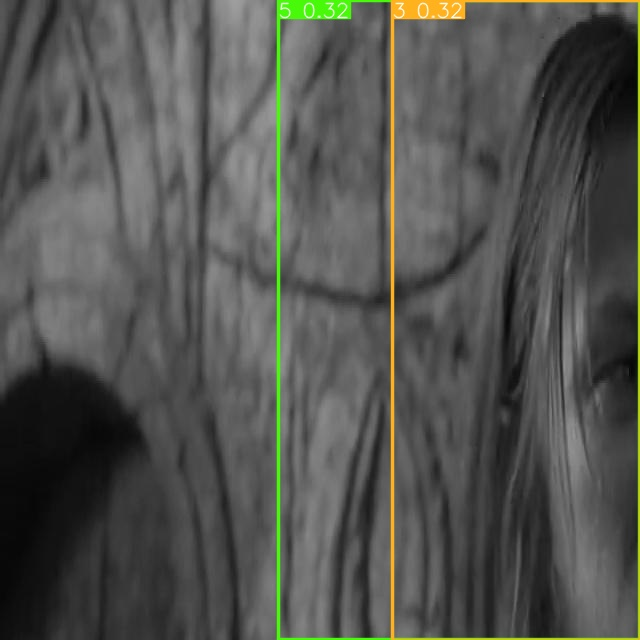

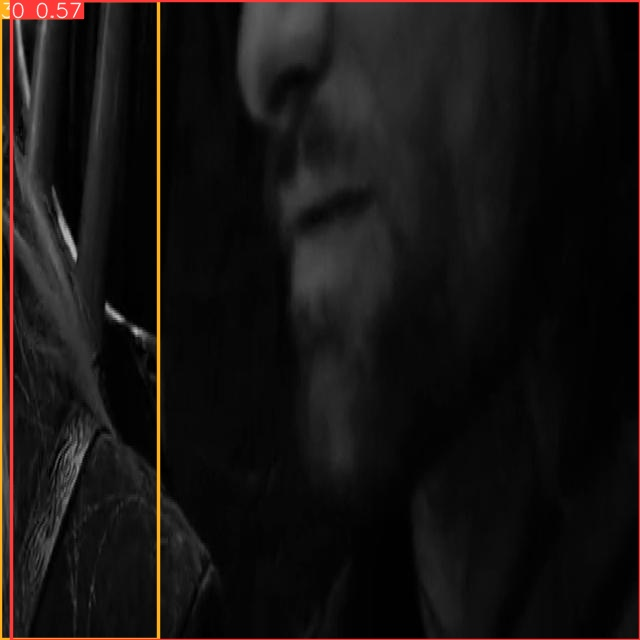

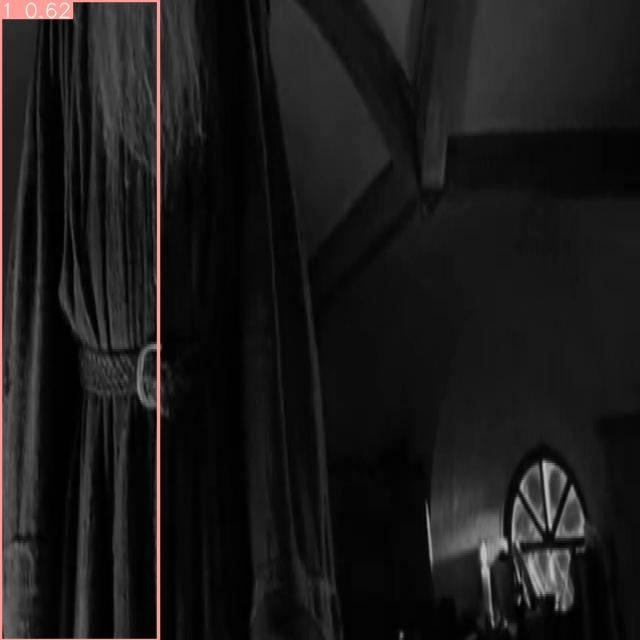

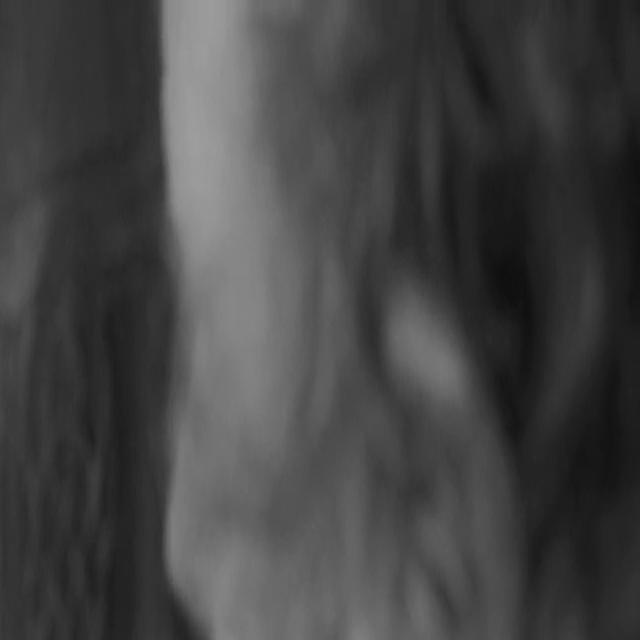

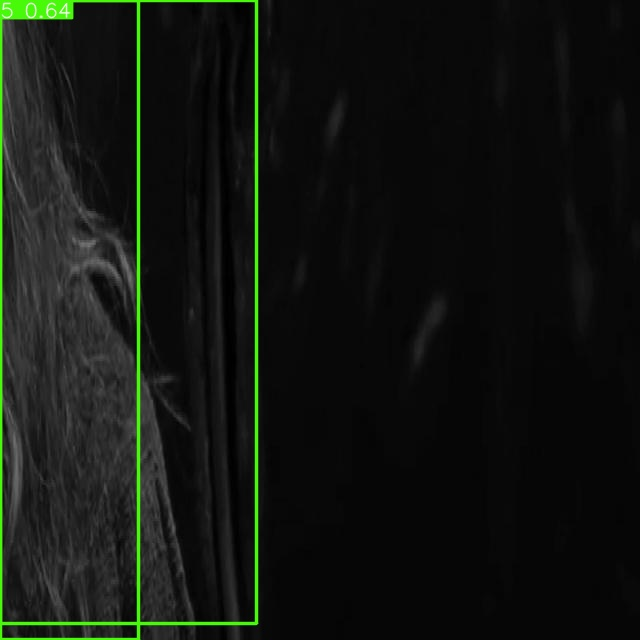

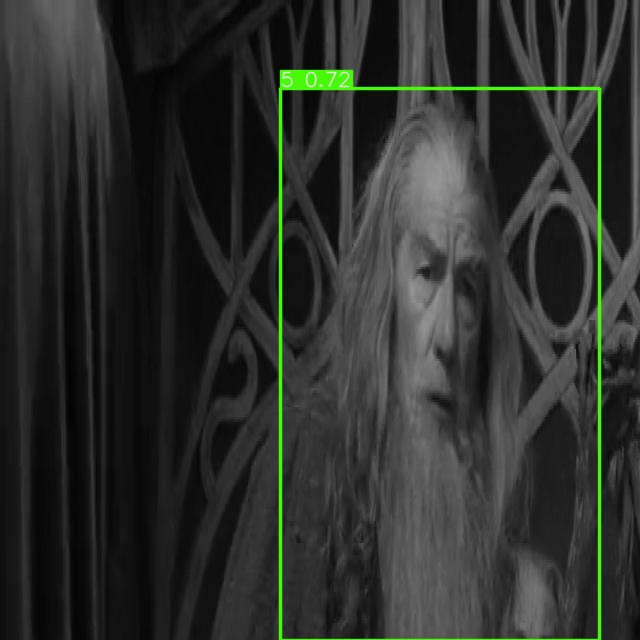

In [29]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[10:20]:
      display(Image(filename=image_path, width=300))
      print("\n")

This work is aspired from https://www.kaggle.com/code/humagonen/predicting-friends-tv-show-characters-yolo

### Please check my works out https://www.kaggle.com/adnanyaramis. 
### If you like it, do not forget to upvote!!!